In [1]:
import pandas as pd
import glob

# List of files (adjust this to match your local setup)
files = glob.glob(r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project\All Pollutants Daily AQI Values 2010 to 2023 - *.csv')

# Dictionary to hold dataframes
df_dict = {}

for file in files:
    # Extract county name from file name
    county_name = file.split(" - ")[1].split(".csv")[0]
    # Read CSV file into a DataFrame
    df = pd.read_csv(file, parse_dates=['Date'])
    # Add DataFrame to our dictionary
    df_dict[county_name] = df

# Comparison Analysis

# 1. Average AQI values per county
average_aqi = {county: df[' AQI Value'].mean() for county, df in df_dict.items()}

# 2. Number of instances where the AQI exceeds a certain threshold
# as per the AQI scale, a value between 0-50 is considered good and 51-100 is moderate
threshold = 100
high_aqi_counts = {county: df[df[' AQI Value'] > threshold].shape[0] for county, df in df_dict.items()}

# 3. Main Pollutants in each county
main_pollutants = {county: df['Main Pollutant'].value_counts().idxmax() for county, df in df_dict.items()}

# Print results
print("Average AQI values per county:", average_aqi)
print("Number of instances where the AQI exceeds a threshold:", high_aqi_counts)
print("Main Pollutants in each county:", main_pollutants)


Average AQI values per county: {'Barnstable County': 37.45867861142217, 'Berkshire County': 39.50547633808638, 'Bristol County': 41.203351726956875, 'Dukes County': 38.25824800910125, 'Essex County': 41.584164461632405, 'Hampden County': 42.945857927946264, 'Hampshire County': 39.12891344383057, 'Middlesex County': 36.17462594794015, 'Norfolk County': 37.897729597054614, 'Plymouth County': 37.738053540155114, 'Suffolk County': 44.58526658526659, 'Worcester County': 41.44851444851445}
Number of instances where the AQI exceeds a threshold: {'Barnstable County': 42, 'Berkshire County': 28, 'Bristol County': 61, 'Dukes County': 51, 'Essex County': 49, 'Hampden County': 62, 'Hampshire County': 42, 'Middlesex County': 15, 'Norfolk County': 44, 'Plymouth County': 14, 'Suffolk County': 24, 'Worcester County': 31}
Main Pollutants in each county: {'Barnstable County': 'Ozone', 'Berkshire County': 'PM2.5', 'Bristol County': 'Ozone', 'Dukes County': 'Ozone', 'Essex County': 'Ozone', 'Hampden Count

In [26]:
# Comparison Analysis for pre and during pandemic

# Define time periods
pre_pandemic = pd.date_range(start='2010-01-01', end='2019-12-31')
during_pandemic = pd.date_range(start='2020-01-01', end='2023-12-31') # Bad definition of pandemic and did pick more dates based on lockdown after wards in the code

# Pre-pandemic analysis
average_aqi_pre = {county: df[df['Date'].isin(pre_pandemic)][' AQI Value'].mean() for county, df in df_dict.items()}
high_aqi_counts_pre = {county: df[(df['Date'].isin(pre_pandemic)) & (df[' AQI Value'] > threshold)].shape[0] for county, df in df_dict.items()}
main_pollutants_pre = {county: df[df['Date'].isin(pre_pandemic)]['Main Pollutant'].value_counts().idxmax() for county, df in df_dict.items()}

# During pandemic analysis
average_aqi_during = {county: df[df['Date'].isin(during_pandemic)][' AQI Value'].mean() for county, df in df_dict.items()}
high_aqi_counts_during = {county: df[(df['Date'].isin(during_pandemic)) & (df[' AQI Value'] > threshold)].shape[0] for county, df in df_dict.items()}
main_pollutants_during = {county: df[df['Date'].isin(during_pandemic)]['Main Pollutant'].value_counts().idxmax() for county, df in df_dict.items()}

# Print results
print("Average AQI values pre-pandemic:", average_aqi_pre)
print("Number of instances where the AQI exceeds a threshold pre-pandemic:", high_aqi_counts_pre)
print("Main Pollutants pre-pandemic:", main_pollutants_pre)
print("Average AQI values during pandemic:", average_aqi_during)
print("Number of instances where the AQI exceeds a threshold during pandemic:", high_aqi_counts_during)
print("Main Pollutants during pandemic:", main_pollutants_during)


Average AQI values pre-pandemic: {'Barnstable County': 37.46413110698825, 'Berkshire County': 39.58289069052278, 'Bristol County': 41.55907463508675, 'Dukes County': 38.49557522123894, 'Essex County': 42.323746918652425, 'Hampden County': 43.50534100246508, 'Hampshire County': 39.784222100054976, 'Middlesex County': 35.877799281172244, 'Norfolk County': 37.90488006617039, 'Plymouth County': 37.03211678832117, 'Suffolk County': 46.42962760131435, 'Worcester County': 41.8315991237678}
Number of instances where the AQI exceeds a threshold pre-pandemic: {'Barnstable County': 35, 'Berkshire County': 24, 'Bristol County': 50, 'Dukes County': 48, 'Essex County': 42, 'Hampden County': 55, 'Hampshire County': 38, 'Middlesex County': 12, 'Norfolk County': 36, 'Plymouth County': 9, 'Suffolk County': 19, 'Worcester County': 26}
Main Pollutants pre-pandemic: {'Barnstable County': 'Ozone', 'Berkshire County': 'PM2.5', 'Bristol County': 'Ozone', 'Dukes County': 'Ozone', 'Essex County': 'Ozone', 'Hamp

In [27]:
# Convert to pandas DataFrame
pre_pandemic_df = pd.DataFrame({'County': list(df_dict.keys()), 'Average AQI Pre-Pandemic': list(average_aqi_pre.values()), 'High AQI Count Pre-Pandemic': list(high_aqi_counts_pre.values()), 'Main Pollutant Pre-Pandemic': list(main_pollutants_pre.values())})
during_pandemic_df = pd.DataFrame({'County': list(df_dict.keys()), 'Average AQI During Pandemic': list(average_aqi_during.values()), 'High AQI Count During Pandemic': list(high_aqi_counts_during.values()), 'Main Pollutant During Pandemic': list(main_pollutants_during.values())})

# Merge dataframes
result_df = pd.merge(pre_pandemic_df, during_pandemic_df, on='County')

# Set county as index
result_df.set_index('County', inplace=True)

# Print the result
print(result_df)


                   Average AQI Pre-Pandemic  High AQI Count Pre-Pandemic   
County                                                                     
Barnstable County                 37.464131                           35  \
Berkshire County                  39.582891                           24   
Bristol County                    41.559075                           50   
Dukes County                      38.495575                           48   
Essex County                      42.323747                           42   
Hampden County                    43.505341                           55   
Hampshire County                  39.784222                           38   
Middlesex County                  35.877799                           12   
Norfolk County                    37.904880                           36   
Plymouth County                   37.032117                            9   
Suffolk County                    46.429628                           19   
Worcester Co

Several observations that could be made based on this dataset:

As per the AQI scale, a value between 0-50 is considered good and 51-100 is moderate

Average AQI: In most counties, the Average AQI During Pandemic seems to be lower than the Average AQI Pre-Pandemic. This indicates that the air quality generally improved during the pandemic. This could be attributed to lockdown measures that resulted in decreased vehicular and industrial emissions.

High AQI Count: The number of instances where AQI exceeded the threshold is also noticeably lower during the pandemic in all counties. This further supports the theory that air quality has improved during the pandemic.

Main Pollutant: The main pollutant in most counties remained the same before and during the pandemic. Interestingly, in every county except for Suffolk, Ozone is listed as the main pollutant. Suffolk county's main pollutant is PM2.5 both before and during the pandemic. It may be worth investigating why Suffolk County differs from the rest.

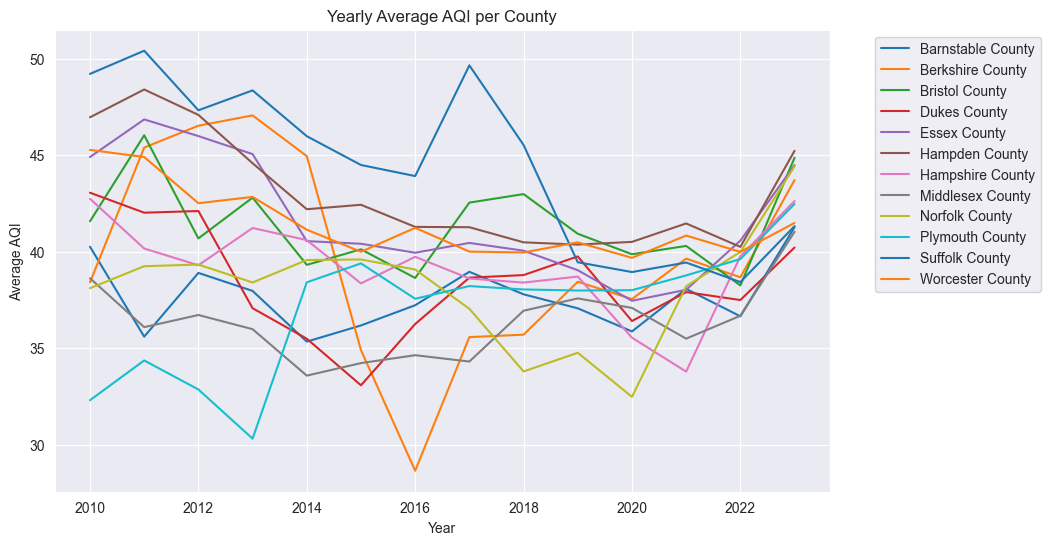

In [28]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# List of files (adjust this to match your local setup)
files = glob.glob(r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project\All Pollutants Daily AQI Values 2010 to 2023 - *.csv')

# Dictionary to hold dataframes
df_dict = {}

for file in files:
    # Extract county name from file name
    county_name = file.split(" - ")[1].split(".csv")[0]
    # Read CSV file into a DataFrame
    df = pd.read_csv(file, parse_dates=['Date'])
    # Add DataFrame to our dictionary
    df_dict[county_name] = df

# Plotting
plt.figure(figsize=(10, 6))

for county, df in df_dict.items():
    # Group by year and calculate the mean AQI
    yearly_avg_aqi = df.groupby(df['Date'].dt.year)[' AQI Value'].mean()
    yearly_avg_aqi.plot(label=county)

plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Yearly Average AQI per County')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


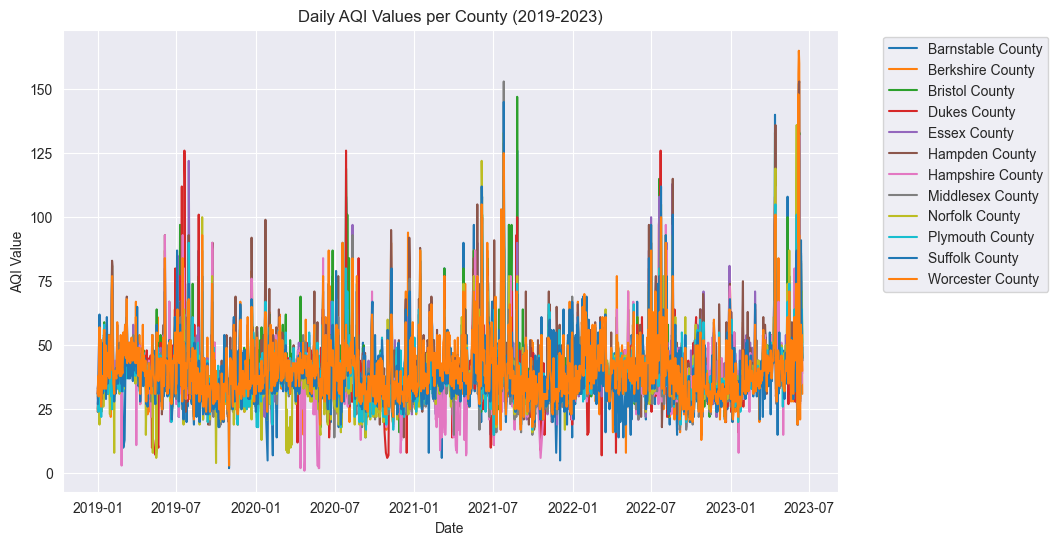

In [29]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# List of files (adjust this to match your local setup)
files = glob.glob(r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project\All Pollutants Daily AQI Values 2010 to 2023 - *.csv')

# Dictionary to hold dataframes
df_dict = {}

# We specifically focus for the years 2019 - 2023
for file in files:
    # Extract county name from file name
    county_name = file.split(" - ")[1].split(".csv")[0]
    # Read CSV file into a DataFrame
    df = pd.read_csv(file, parse_dates=['Date'])
    # Filter data for the years 2019 to 2023
    df = df[(df['Date'].dt.year >= 2019) & (df['Date'].dt.year <= 2023)]
    # Add DataFrame to our dictionary
    df_dict[county_name] = df

# Plotting
plt.figure(figsize=(10, 6))

for county, df in df_dict.items():
    plt.plot(df['Date'], df[' AQI Value'], label=county)

plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.title('Daily AQI Values per County (2019-2023)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Clearly too granular to read anything. But the May 2023 clearly shows the wildfire chaos :)

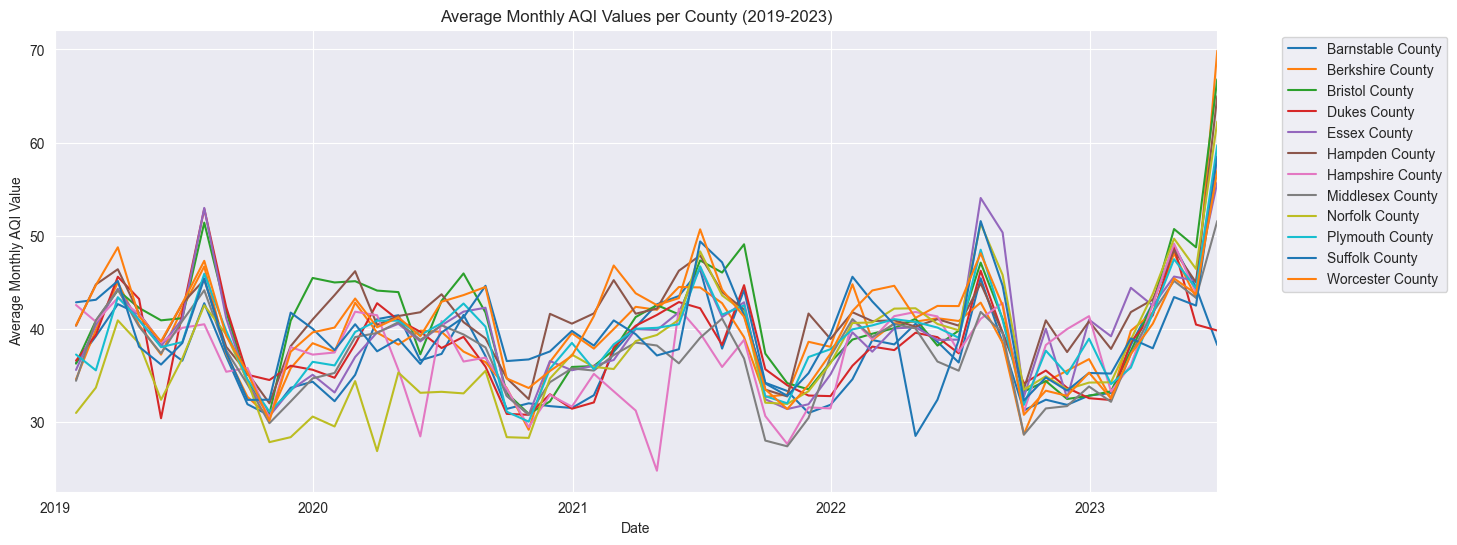

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of files (adjust this to match your local setup)
files = glob.glob(r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project\All Pollutants Daily AQI Values 2010 to 2023 - *.csv')

# Dictionary to hold dataframes
df_dict = {}

for file in files:
    # Extract county name from file name
    county_name = file.split(" - ")[1].split(".csv")[0]
    # Read CSV file into a DataFrame
    df = pd.read_csv(file, parse_dates=['Date'])
    # Filter data for the years 2019 to 2023
    df = df[(df['Date'].dt.year >= 2019) & (df['Date'].dt.year <= 2023)]
    # Resample data to get monthly averages
    df = df.resample('M', on='Date')[' AQI Value'].mean().reset_index()
    # Add DataFrame to our dictionary
    df_dict[county_name] = df

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

for county, df in df_dict.items():
    ax.plot(df['Date'], df[' AQI Value'], label=county)

ax.set_xlabel('Date')
ax.set_ylabel('Average Monthly AQI Value')
ax.set_title('Average Monthly AQI Values per County (2019-2023)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis limits
ax.set_xlim([pd.to_datetime('2019-01-01'), pd.to_datetime('2023-06-30')])

# Format x-axis to show years and months
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.show()


Importing COVID-19 Data

In [33]:
import pandas as pd
import glob

# Load the data
covid_df = pd.read_csv('Covid_data_by_date_corrected.csv')

# Convert the 'date' column to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Sort the dataframe by 'County Name' and 'date'
covid_df = covid_df.sort_values(['County Name', 'date'])

# Calculate the number of new cases per day
covid_df['cases'] = covid_df.groupby('County Name')['cases'].diff().fillna(0)

# Convert negative values (which can occur due to data corrections) to 0
covid_df['cases'] = covid_df['cases'].clip(lower=0)

covid_df


,countyFIPS,County Name,State,StateFIPS,date,cases
1,25001,Barnstable County,MA,25,2020-01-22,0.0
16,25001,Barnstable County,MA,25,2020-01-23,0.0
31,25001,Barnstable County,MA,25,2020-01-24,0.0
46,25001,Barnstable County,MA,25,2020-01-25,0.0
61,25001,Barnstable County,MA,25,2020-01-26,0.0
...,...,...,...,...,...,...
18284,25027,Worcester County,MA,25,2023-05-25,0.0
18299,25027,Worcester County,MA,25,2023-05-26,0.0
18314,25027,Worcester County,MA,25,2023-05-27,0.0
18329,25027,Worcester County,MA,25,2023-05-28,0.0


In [34]:
# To read all CSV files with AQI data into one dataframe
path = r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project'
all_files = glob.glob(path + "/All Pollutants Daily AQI Values 2010 to 2023 - *.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    county = filename.split(" - ")[-1].replace(".csv", "") # extracting county name from file name
    df['County Name'] = county
    li.append(df)

aqi_df = pd.concat(li, axis=0, ignore_index=True)


In [35]:
aqi_df

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source,County Name
0,01/02/2010,12,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
1,01/05/2010,11,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
2,01/08/2010,11,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
3,01/11/2010,25,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
4,01/14/2010,13,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
...,...,...,...,...,...,...,...
56893,06/11/2023,46,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County
56894,06/12/2023,58,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County
56895,06/13/2023,45,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County
56896,06/14/2023,54,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County


In [36]:
# Convert the 'Date' column to datetime format
aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])

In [37]:
aqi_df

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source,County Name
0,2010-01-02,12,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
1,2010-01-05,11,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
2,2010-01-08,11,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
3,2010-01-11,25,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
4,2010-01-14,13,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS,Barnstable County
...,...,...,...,...,...,...,...
56893,2023-06-11,46,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County
56894,2023-06-12,58,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County
56895,2023-06-13,45,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County
56896,2023-06-14,54,Ozone,UXBRIDGE,25-027-0024,AirNow,Worcester County


In [38]:
covid_df['County Name'] = covid_df['County Name'].str.strip()

# Merge the two datasets on 'date' and 'County Name'
merged_df = pd.merge(covid_df, aqi_df, left_on=['date', 'County Name'], right_on=['Date', 'County Name'], how='inner')


In [39]:
merged_df

,countyFIPS,County Name,State,StateFIPS,date,cases,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,25001,Barnstable County,MA,25,2020-01-22,0.0,2020-01-22,34,Ozone,TRURO NATIONAL SEASHORE,25-001-0002,AQS
1,25001,Barnstable County,MA,25,2020-01-23,0.0,2020-01-23,29,Ozone,TRURO NATIONAL SEASHORE,25-001-0002,AQS
2,25001,Barnstable County,MA,25,2020-01-28,0.0,2020-01-28,5,PM2.5,TRURO NATIONAL SEASHORE,25-001-0002,AQS
3,25001,Barnstable County,MA,25,2020-01-29,0.0,2020-01-29,39,Ozone,TRURO NATIONAL SEASHORE,25-001-0002,AQS
4,25001,Barnstable County,MA,25,2020-01-30,0.0,2020-01-30,38,Ozone,TRURO NATIONAL SEASHORE,25-001-0002,AQS
...,...,...,...,...,...,...,...,...,...,...,...,...
14594,25027,Worcester County,MA,25,2023-05-25,0.0,2023-05-25,31,Ozone,UXBRIDGE,25-027-0024,AirNow
14595,25027,Worcester County,MA,25,2023-05-26,0.0,2023-05-26,40,Ozone,UXBRIDGE,25-027-0024,AirNow
14596,25027,Worcester County,MA,25,2023-05-27,0.0,2023-05-27,45,Ozone,UXBRIDGE,25-027-0024,AirNow
14597,25027,Worcester County,MA,25,2023-05-28,0.0,2023-05-28,61,Ozone,UXBRIDGE,25-027-0024,AirNow


In [40]:
# Check date formats:
print(covid_df['date'].head())
print(aqi_df['Date'].head())

# Check 'County Name' in both dataframes:
print(covid_df['County Name'].unique())
print(aqi_df['County Name'].unique())


1    2020-01-22
16   2020-01-23
31   2020-01-24
46   2020-01-25
61   2020-01-26
Name: date, dtype: datetime64[ns]
0   2010-01-02
1   2010-01-05
2   2010-01-08
3   2010-01-11
4   2010-01-14
Name: Date, dtype: datetime64[ns]
['Barnstable County' 'Berkshire County' 'Bristol County' 'Dukes County'
 'Essex County' 'Franklin County' 'Hampden County' 'Hampshire County'
 'Middlesex County' 'Norfolk County' 'Plymouth County'
 'Statewide Unallocated' 'Suffolk County' 'Town and County of Nantucket'
 'Worcester County']
['Barnstable County' 'Berkshire County' 'Bristol County' 'Dukes County'
 'Essex County' 'Hampden County' 'Hampshire County' 'Middlesex County'
 'Norfolk County' 'Plymouth County' 'Suffolk County' 'Worcester County']


C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


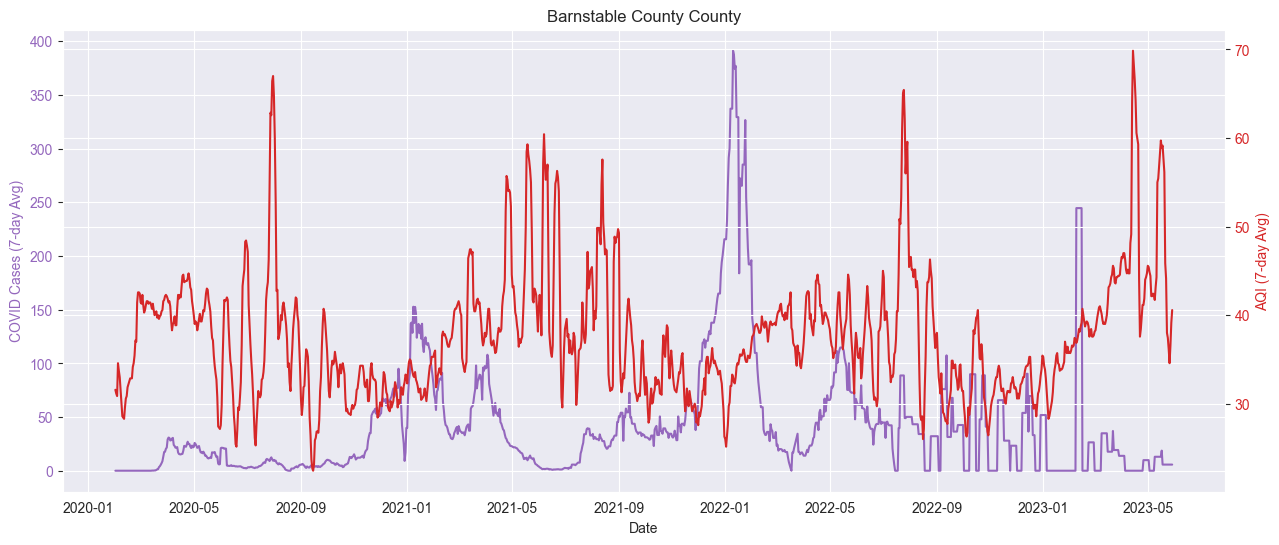

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


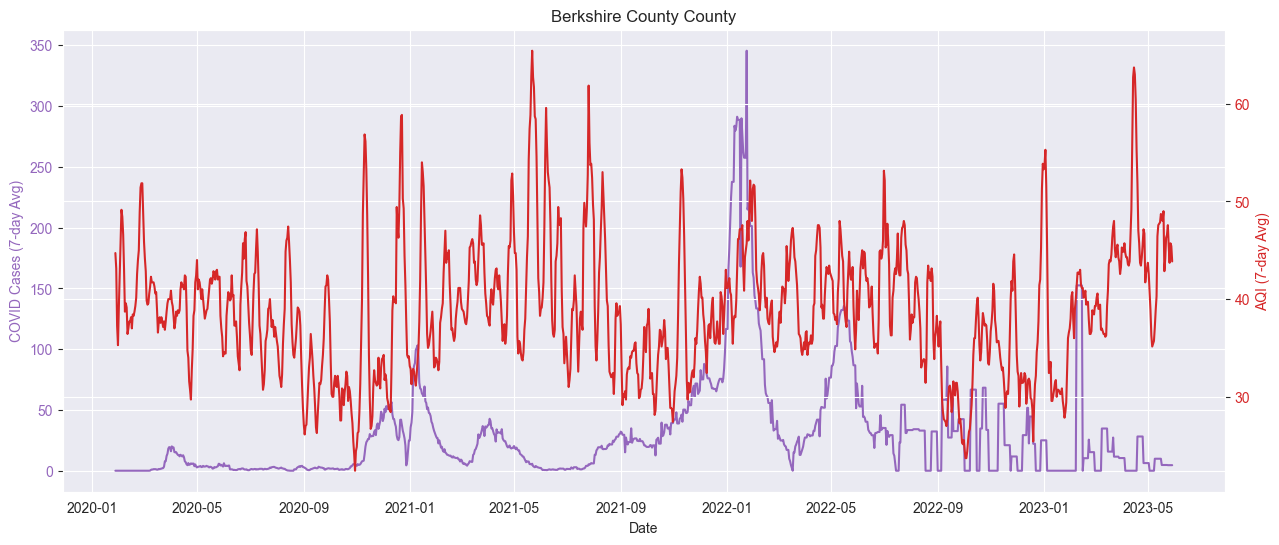

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


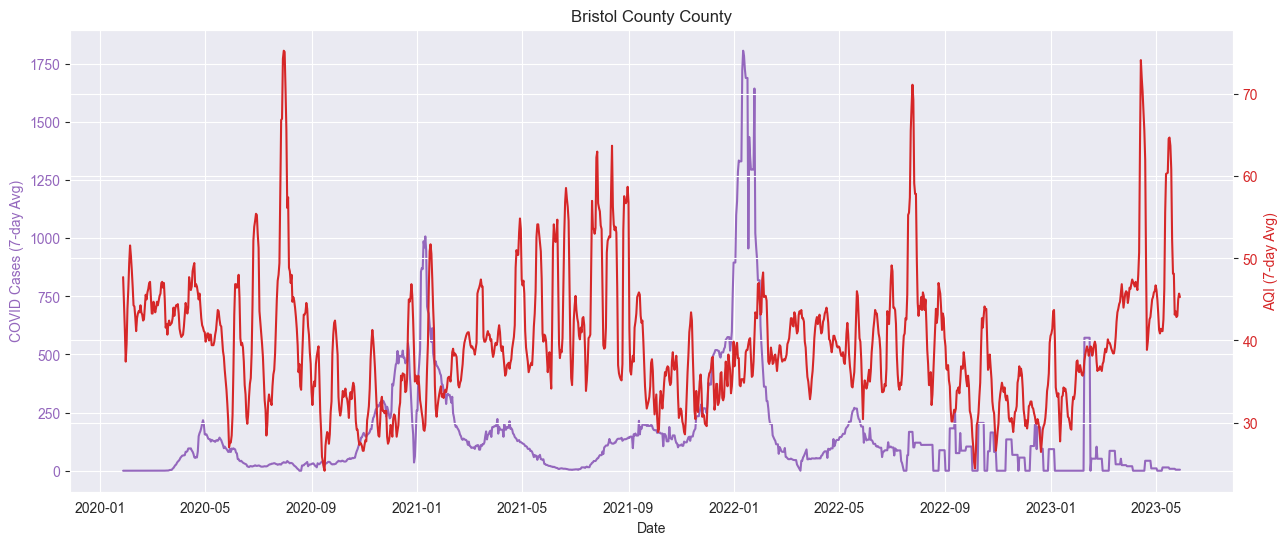

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


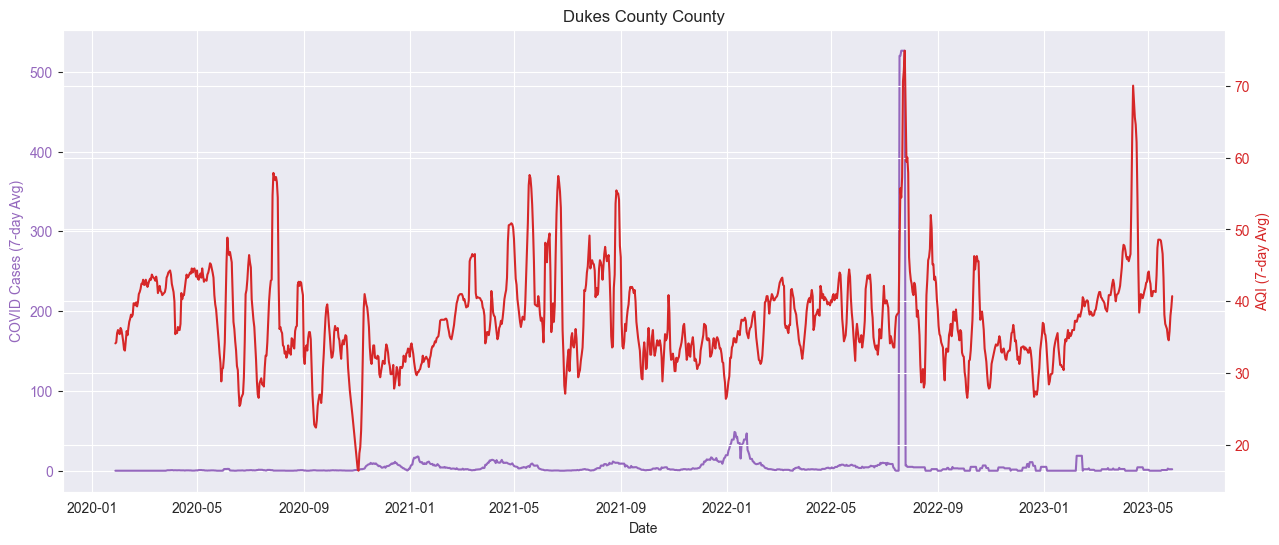

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


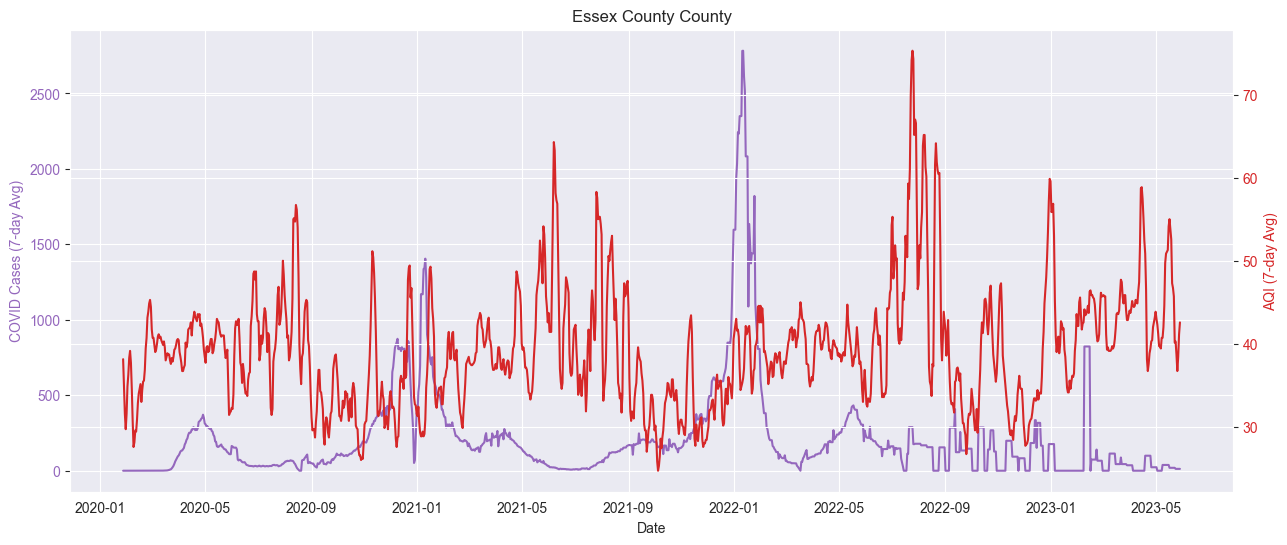

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


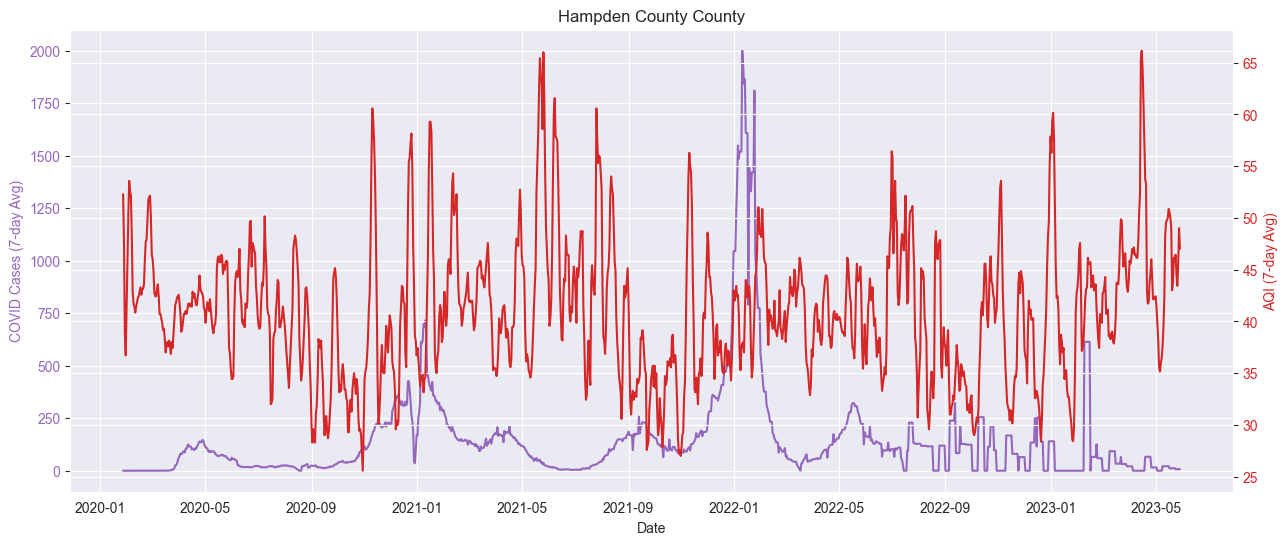

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


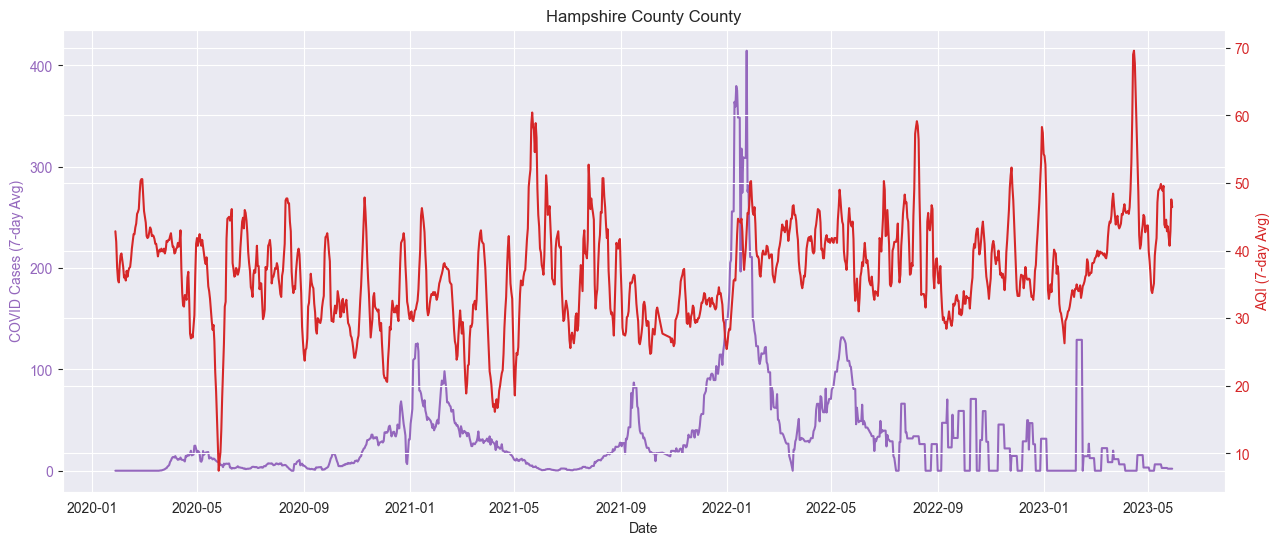

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


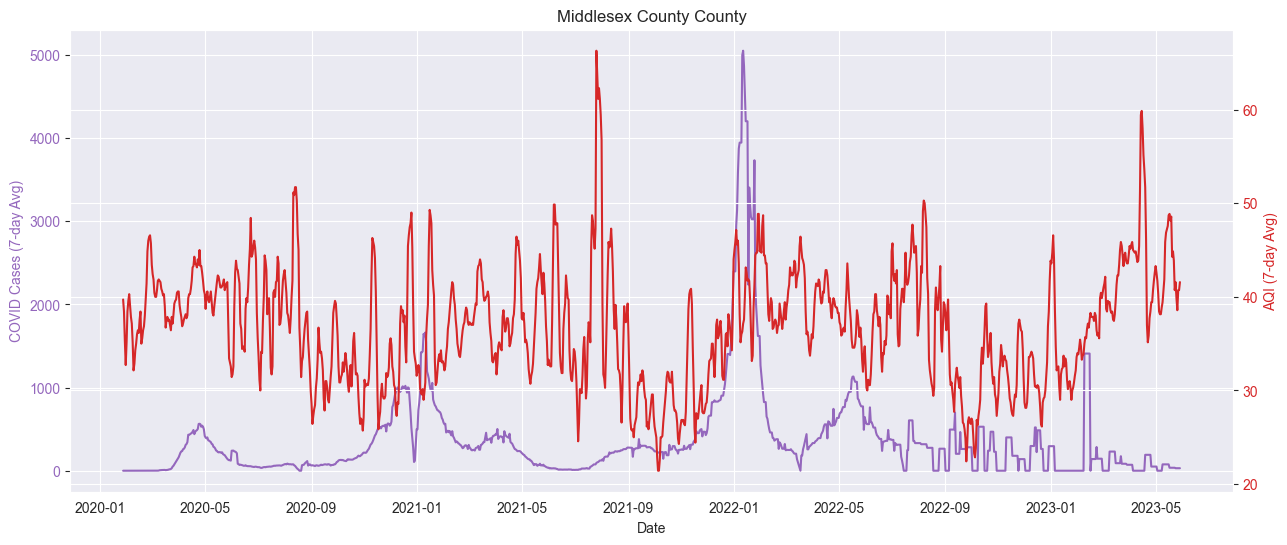

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


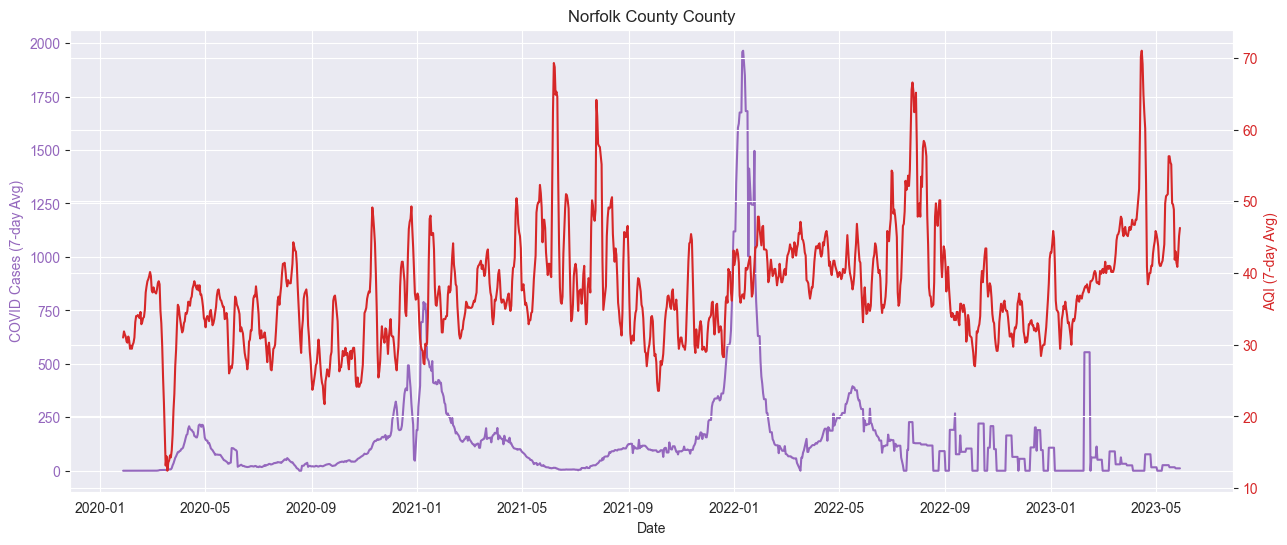

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


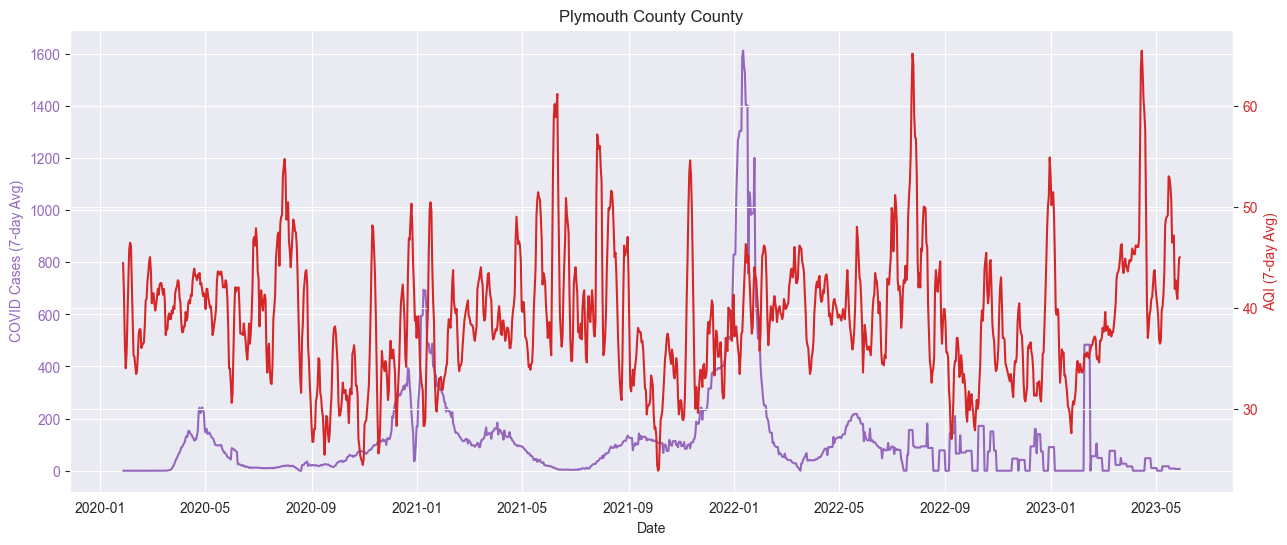

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


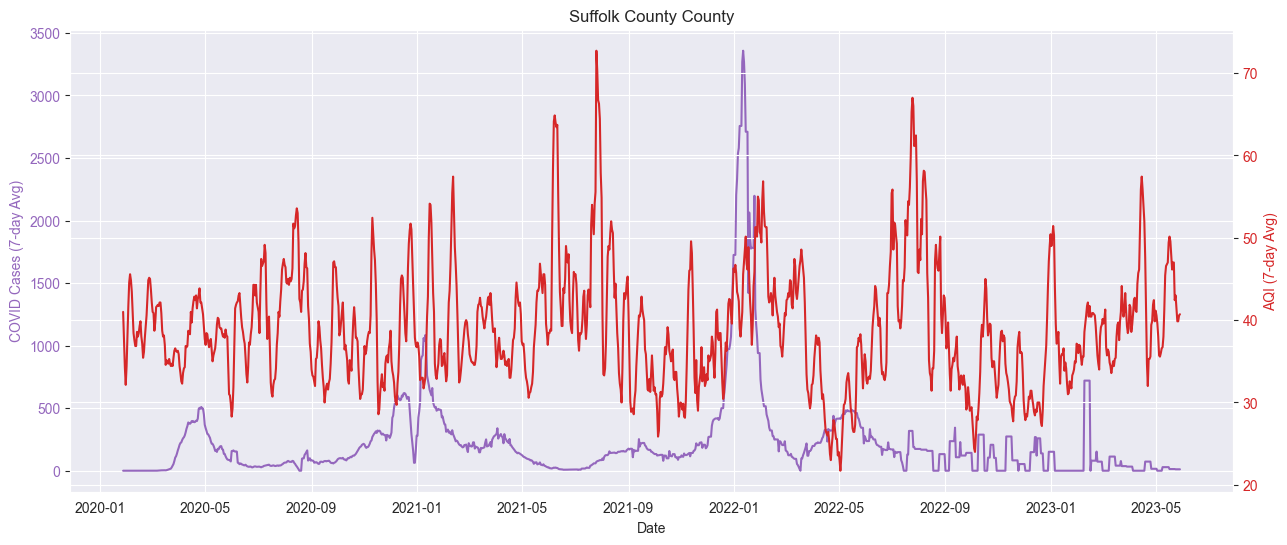

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3711508764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()


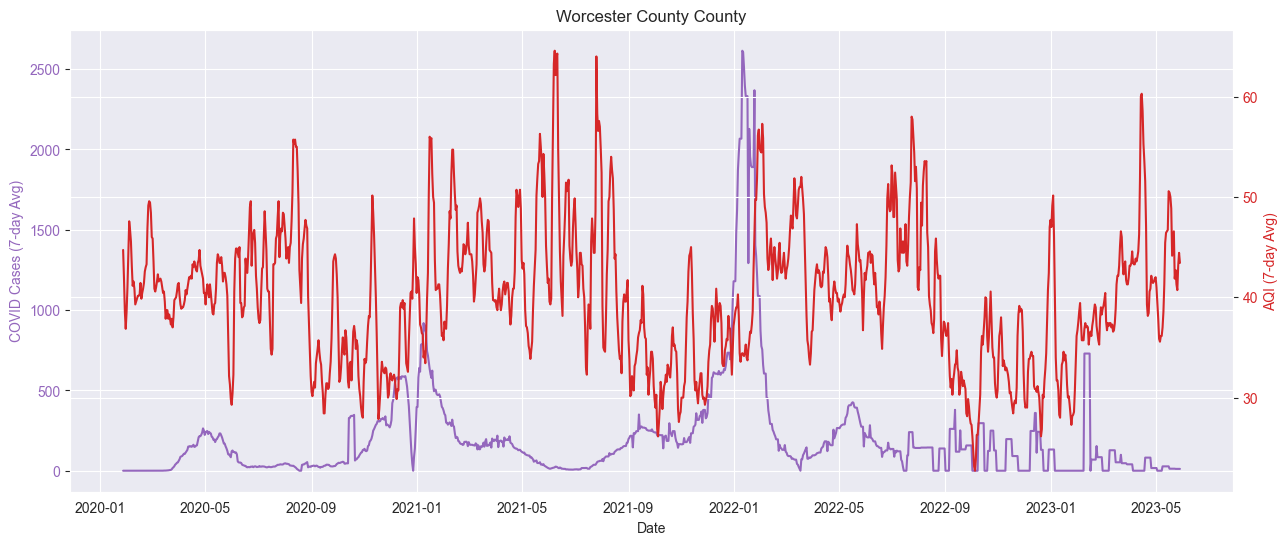

In [41]:
import matplotlib.pyplot as plt

# Create a list of unique county names
counties = merged_df['County Name'].unique()

for county in counties:
    # Filter the dataframe for the current county
    county_df = merged_df[merged_df['County Name'] == county]

    # Calculate 7-day rolling averages
    county_df['cases_7day_avg'] = county_df['cases'].rolling(7).mean()
    county_df['AQI_7day_avg'] = county_df[' AQI Value'].rolling(7).mean()

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot COVID cases on the left y-axis
    color = 'tab:purple'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('COVID Cases (7-day Avg)', color=color)
    ax1.plot(county_df['date'], county_df['cases_7day_avg'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the AQI values
    ax2 = ax1.twinx()

    # Plot AQI values on the right y-axis
    color = 'tab:red'
    ax2.set_ylabel('AQI (7-day Avg)', color=color)
    ax2.plot(county_df['date'], county_df['AQI_7day_avg'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Set the title
    plt.title(f'{county} County')

    # Show the plot
    plt.show()


In [42]:
print(covid_df[covid_df['County Name'].isin(['Statewide Unallocated', 'Town and County of Nantucket'])])

       countyFIPS                   County Name State  StateFIPS       date   
0               0         Statewide Unallocated    MA         25 2020-01-22  \
15              0         Statewide Unallocated    MA         25 2020-01-23   
30              0         Statewide Unallocated    MA         25 2020-01-24   
45              0         Statewide Unallocated    MA         25 2020-01-25   
60              0         Statewide Unallocated    MA         25 2020-01-26   
...           ...                           ...   ...        ...        ...   
18280       25019  Town and County of Nantucket    MA         25 2023-05-25   
18295       25019  Town and County of Nantucket    MA         25 2023-05-26   
18310       25019  Town and County of Nantucket    MA         25 2023-05-27   
18325       25019  Town and County of Nantucket    MA         25 2023-05-28   
18340       25019  Town and County of Nantucket    MA         25 2023-05-29   

       cases  
0        0.0  
15       0.0  
30    

In [43]:
correlation = merged_df['cases'].corr(merged_df[' AQI Value'])

In [44]:
print(correlation)

0.006710583812474273


This is the over all correlation between COVID -19 cases and AQI Values. As you can see they are not correlated at all

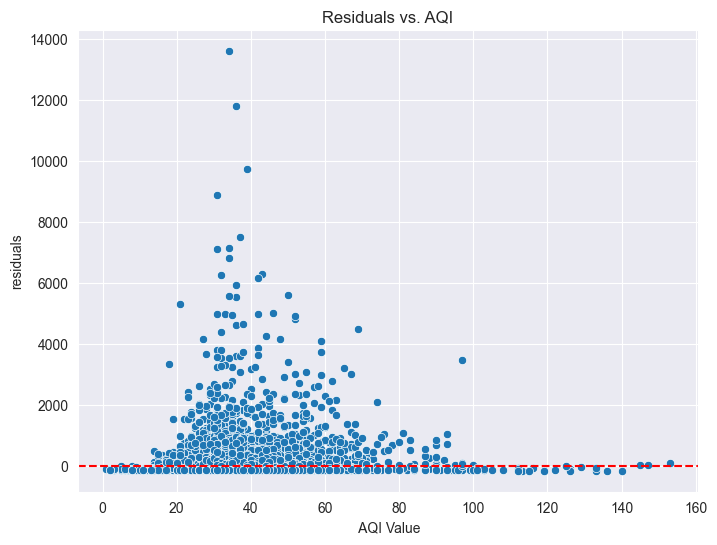

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a simple linear regression model
X = sm.add_constant(merged_df[' AQI Value'])
Y = merged_df['cases']
model = sm.OLS(Y, X).fit()

# Calculate the residuals
merged_df['residuals'] = model.resid

# Plot the residuals
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x=' AQI Value', y='residuals')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.title('Residuals vs. AQI')
plt.show()


In [46]:
print('Coefficients:', model.params)
print('P-values:', model.pvalues)
print('R-squared:', model.rsquared)


Coefficients: const         129.322175
 AQI Value      0.246342
dtype: float64
P-values: const         8.547555e-26
 AQI Value    4.175065e-01
dtype: float64
R-squared: 4.503193510418946e-05


In [47]:
# Calculate the overall Spearman correlation
spearman_correlation = merged_df['cases'].corr(merged_df[' AQI Value'], method='spearman')
print("Overall Spearman correlation: ", spearman_correlation)

Overall Spearman correlation:  -0.009575426134553063


In [48]:
correlations = merged_df.groupby('County Name').apply(lambda group: group['cases'].corr(group[' AQI Value']))
print(correlations)


County Name
Barnstable County   -0.050220
Berkshire County     0.037676
Bristol County      -0.047158
Dukes County         0.154892
Essex County        -0.028191
Hampden County       0.003870
Hampshire County     0.037681
Middlesex County     0.032720
Norfolk County       0.030540
Plymouth County     -0.019960
Suffolk County       0.024683
Worcester County    -0.020458
dtype: float64


All the correlation coefficients are close to 0, which suggests there is little to no linear relationship between the number of COVID cases and the AQI value in these counties. However, the direction of the (weak) relationships varies:

Counties like Barnstable, Bristol, Essex, Plymouth, and Worcester have negative correlations, albeit very weak. This suggests that, to a very small extent, an increase in AQI value might be associated with a decrease in COVID cases, or vice versa. However, given the weakness of the correlation, this is likely not a meaningful relationship and could easily be due to random variation.

Counties like Berkshire, Dukes, Hampden, Hampshire, Middlesex, Norfolk, and Suffolk have positive correlations, again very weak. This suggests that, to a very small extent, an increase in AQI value might be associated with an increase in COVID cases, or vice versa. Again, given the weakness of the correlation, this is likely not a meaningful relationship and could easily be due to random variation.

The county with the highest correlation is Dukes County, with a correlation of 0.154892. This is still a very weak correlation, but it is the strongest among the counties you're analyzing. This suggests that in Dukes County, there might be a slightly stronger relationship between AQI value and COVID cases than in other counties, but again, this is still a weak relationship.

Overall, these results suggest that there is no strong linear relationship between AQI value and COVID cases in these counties, at least not one that is detectable by simple correlation. Other factors not included in this analysis could be influencing the number of COVID cases, and the relationship could be more complex than a simple linear one. It's also important to remember that correlation does not imply causation. Even if a stronger correlation was found, it would not necessarily mean that changes in AQI cause changes in COVID cases, or vice versa.

In [49]:
# Calculate the Spearman correlation for each county
spearman_correlations = merged_df.groupby('County Name').apply(lambda group: group['cases'].corr(group[' AQI Value'], method='spearman'))
print("County-wise Spearman correlations: ")
print(spearman_correlations)

County-wise Spearman correlations: 
County Name
Barnstable County   -0.007368
Berkshire County     0.036977
Bristol County      -0.058723
Dukes County        -0.040861
Essex County        -0.086584
Hampden County      -0.005434
Hampshire County    -0.084654
Middlesex County     0.016749
Norfolk County      -0.019356
Plymouth County     -0.043135
Suffolk County      -0.005039
Worcester County     0.037259
dtype: float64


In [50]:
from scipy.stats import kendalltau

# Overall Kendall's tau
tau, p_value = kendalltau(merged_df['cases'], merged_df[' AQI Value'])
print("Overall Kendall's tau: ", tau)

# County-wise Kendall's tau
kendall_correlations = merged_df.groupby('County Name').apply(lambda group: kendalltau(group['cases'], group[' AQI Value'])[0])
print("\nCounty-wise Kendall's tau correlations:\n", kendall_correlations)


Overall Kendall's tau:  -0.007156212226972158

County-wise Kendall's tau correlations:
 County Name
Barnstable County   -0.007544
Berkshire County     0.026769
Bristol County      -0.044008
Dukes County        -0.031294
Essex County        -0.063070
Hampden County      -0.004201
Hampshire County    -0.059465
Middlesex County     0.011684
Norfolk County      -0.012518
Plymouth County     -0.031291
Suffolk County      -0.005018
Worcester County     0.025166
dtype: float64


Performing a similar correlation analysis but for different time periods (before, during, after lockdowns) or different seasons (winter, spring, summer, fall).

First, we need to define the time periods for the lockdowns and the seasons. For example, we might consider the lockdown period to be from March 2020 to May 2020, and the seasons could be defined as follows: winter (December, January, February), spring (March, April, May), summer (June, July, August), and fall (September, October, November).

https://www.mass.gov/info-details/reopening-massachusetts
https://www.mass.gov/info-details/covid-19-state-of-emergency#reopening-protocols-&-business-restrictions-(archive)-

Based on the information provided in the links, the COVID-19 lockdown in Massachusetts can be considered to have started on March 24, 2020, when Governor Charlie Baker ordered all non-essential businesses to close. The lockdown was effectively lifted on May 18, 2020, when the state entered Phase 1 of its reopening plan. However, certain restrictions remained in place until August 1, 2021, when the state of emergency officially ended.

Therefore, for a stricter definition of lockdown, we could use:

    Lockdown start: March 24, 2020
    Lockdown end: May 18, 2020

In [51]:
# Define lockdown periods
lockdown_start = pd.to_datetime('2020-03-24')
lockdown_end = pd.to_datetime('2020-05-18')

# Define seasons
winter_months = [12, 1, 2]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]

# Create a new column for season based on the month
merged_df['Season'] = merged_df['Date'].dt.month.apply(lambda month: 'Winter' if month in winter_months else ('Spring' if month in spring_months else ('Summer' if month in summer_months else 'Fall')))

# Perform correlation analysis for different time periods and seasons
time_periods = [('Lockdown', lockdown_start, lockdown_end)] + [(season, None, None) for season in ['Winter', 'Spring', 'Summer', 'Fall']]

for period, start, end in time_periods:
    if start and end:
        # Filter data for the given time period
        period_data = merged_df[(merged_df['Date'] >= start) & (merged_df['Date'] <= end)]
    else:
        # Filter data for the given season
        period_data = merged_df[merged_df['Season'] == period]

    # Calculate correlation for the given time period or season
    correlations = period_data.groupby('County Name').apply(lambda group: group['cases'].corr(group[' AQI Value']))
    print(f"Correlations for {period}:")
    print(correlations)
    print()


Correlations for Lockdown:
County Name
Barnstable County   -0.074571
Berkshire County    -0.056052
Bristol County      -0.182867
Dukes County         0.015574
Essex County         0.066141
Hampden County      -0.005819
Hampshire County     0.079678
Middlesex County     0.197518
Norfolk County       0.190250
Plymouth County      0.044934
Suffolk County       0.303786
Worcester County     0.080031
dtype: float64

Correlations for Winter:
County Name
Barnstable County   -0.049250
Berkshire County     0.075216
Bristol County       0.034526
Dukes County        -0.051820
Essex County        -0.000886
Hampden County      -0.000062
Hampshire County     0.040279
Middlesex County     0.100737
Norfolk County       0.112150
Plymouth County      0.011027
Suffolk County       0.084638
Worcester County    -0.001085
dtype: float64

Correlations for Spring:
County Name
Barnstable County   -0.097797
Berkshire County     0.007365
Bristol County      -0.176554
Dukes County        -0.090385
Essex County   

For a broader definition that includes the period of restrictions, you could use:

    Lockdown start: March 24, 2020
    Lockdown end: August 1, 2021

In [52]:
# Define lockdown periods
lockdown_start = pd.to_datetime('2020-03-24')
lockdown_end = pd.to_datetime('2021-8-1')

# Define seasons
winter_months = [12, 1, 2]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]

# Create a new column for season based on the month
merged_df['Season'] = merged_df['Date'].dt.month.apply(lambda month: 'Winter' if month in winter_months else ('Spring' if month in spring_months else ('Summer' if month in summer_months else 'Fall')))

# Perform correlation analysis for different time periods and seasons
time_periods = [('Lockdown', lockdown_start, lockdown_end)] + [(season, None, None) for season in ['Winter', 'Spring', 'Summer', 'Fall']]

for period, start, end in time_periods:
    if start and end:
        # Filter data for the given time period
        period_data = merged_df[(merged_df['Date'] >= start) & (merged_df['Date'] <= end)]
    else:
        # Filter data for the given season
        period_data = merged_df[merged_df['Season'] == period]

    # Calculate correlation for the given time period or season
    correlations = period_data.groupby('County Name').apply(lambda group: group['cases'].corr(group[' AQI Value']))
    print(f"Correlations for {period}:")
    print(correlations)
    print()


Correlations for Lockdown:
County Name
Barnstable County   -0.069945
Berkshire County    -0.007818
Bristol County      -0.135491
Dukes County        -0.069582
Essex County        -0.081859
Hampden County       0.012590
Hampshire County    -0.039037
Middlesex County    -0.041697
Norfolk County       0.003443
Plymouth County     -0.071710
Suffolk County      -0.051404
Worcester County    -0.093602
dtype: float64

Correlations for Winter:
County Name
Barnstable County   -0.049250
Berkshire County     0.075216
Bristol County       0.034526
Dukes County        -0.051820
Essex County        -0.000886
Hampden County      -0.000062
Hampshire County     0.040279
Middlesex County     0.100737
Norfolk County       0.112150
Plymouth County      0.011027
Suffolk County       0.084638
Worcester County    -0.001085
dtype: float64

Correlations for Spring:
County Name
Barnstable County   -0.097797
Berkshire County     0.007365
Bristol County      -0.176554
Dukes County        -0.090385
Essex County   

The correlation coefficients calculated for different time periods and seasons provide insights into how the relationship between AQI values and COVID-19 cases might have varied over time and across different seasons. Here's a summary of the findings:

1. Lockdown Period: During the lockdown period (March 24, 2020 - May 18, 2020), the correlations are generally weak and vary across counties. Some counties like Middlesex and Norfolk show a weak positive correlation, suggesting a slight increase in AQI values might be associated with an increase in COVID-19 cases during this period. However, other counties like Bristol and Barnstable show a weak negative correlation, suggesting the opposite. It's important to note that these correlations are weak, indicating that the relationship between AQI values and COVID-19 cases is not strong during the lockdown period.

2. Extended Lockdown Period: During the extended lockdown period, the correlations are generally weak and vary across counties. Some counties like Norfolk and Suffolk show a weak positive correlation, suggesting a slight increase in AQI values might be associated with an increase in COVID-19 cases during this period. However, other counties like Bristol and Essex show a weak negative correlation, suggesting the opposite. It's important to note that these correlations are weak, indicating that the relationship between AQI values and COVID-19 cases is not strong during the extended lockdown period.

3. Winter: During the winter months, the correlations are generally weak and vary across counties. Some counties like Middlesex and Norfolk show a weak positive correlation, suggesting a slight increase in AQI values might be associated with an increase in COVID-19 cases during this period. However, other counties like Bristol and Worcester show a weak negative correlation, suggesting the opposite. Again, these correlations are weak, indicating that the relationship between AQI values and COVID-19 cases is not strong during the winter months.

4. Spring: During the spring months, the correlations are generally weak and vary across counties. Some counties like Hampshire and Norfolk show a weak positive correlation, suggesting a slight increase in AQI values might be associated with an increase in COVID-19 cases during this period. However, other counties like Essex and Middlesex show a weak negative correlation, suggesting the opposite. Again, these correlations are weak, indicating that the relationship between AQI values and COVID-19 cases is not strong during the spring months.

5. Summer: During the summer months, the correlations are generally weak and vary across counties. Some counties like Dukes and Essex show a weak positive correlation, suggesting a slight increase in AQI values might be associated with an increase in COVID-19 cases during this period. However, other counties like Bristol and Hampden show a weak negative correlation, suggesting the opposite. Again, these correlations are weak, indicating that the relationship between AQI values and COVID-19 cases is not strong during the summer months.

6. Fall: During the fall months, the correlations are generally weak and vary across counties. Some counties like Hampshire and Norfolk show a weak positive correlation, suggesting a slight increase in AQI values might be associated with an increase in COVID-19 cases during this period. However, other counties like Middlesex and Suffolk show a weak negative correlation, suggesting the opposite. Again, these correlations are weak, indicating that the relationship between AQI values and COVID-19 cases is not strong during the fall months.

In summary, the correlations between AQI values and COVID-19 cases are generally weak and vary across different time periods and seasons. This suggests that the relationship between AQI values and COVID-19 cases is not strong and can vary depending on the time period or season. Other factors not included in this analysis could be influencing the number of COVID-19 cases, and the relationship could be more complex than a simple linear one.


In [53]:
# Define lockdown periods
lockdown_start = pd.to_datetime('2020-03-24')
lockdown_end = pd.to_datetime('2020-05-18')

# Define time periods
before_lockdown = pd.date_range(start='2010-01-01', end=lockdown_start - pd.Timedelta(days=1))
during_lockdown = pd.date_range(start=lockdown_start, end=lockdown_end)
after_lockdown = pd.date_range(start=lockdown_end + pd.Timedelta(days=1), end='2023-12-31')

# Before lockdown analysis
average_aqi_before = {county: df[df['Date'].isin(before_lockdown)][' AQI Value'].mean() for county, df in df_dict.items()}

# During lockdown analysis
average_aqi_during = {county: df[df['Date'].isin(during_lockdown)][' AQI Value'].mean() for county, df in df_dict.items()}

# After lockdown analysis
average_aqi_after = {county: df[df['Date'].isin(after_lockdown)][' AQI Value'].mean() for county, df in df_dict.items()}

# Print results
print("Average AQI values before lockdown:", average_aqi_before)
print("Average AQI values during lockdown:", average_aqi_during)
print("Average AQI values after lockdown:", average_aqi_after)


Average AQI values before lockdown: {'Barnstable County': 36.618379256858525, 'Berkshire County': 38.67782078348581, 'Bristol County': 41.482690706983576, 'Dukes County': 39.0525940471356, 'Essex County': 38.45073513276278, 'Hampden County': 41.01997911511658, 'Hampshire County': 38.8435052552723, 'Middlesex County': 37.52395140481109, 'Norfolk County': 34.329027717872464, 'Plymouth County': 37.92863347786279, 'Suffolk County': 39.41297170703654, 'Worcester County': 40.67679242998645}
Average AQI values during lockdown: {'Barnstable County': 41.273637374860954, 'Berkshire County': 38.97311827956989, 'Bristol County': 44.04784946236559, 'Dukes County': 41.870430107526886, 'Essex County': 40.10591397849463, 'Hampden County': 40.9258064516129, 'Hampshire County': 38.55860215053764, 'Middlesex County': 40.15698924731183, 'Norfolk County': 31.118279569892472, 'Plymouth County': 40.90161290322581, 'Suffolk County': 38.273118279569886, 'Worcester County': 40.730107526881724}
Average AQI value

In [54]:
# Define lockdown periods
lockdown_start_strict = pd.to_datetime('2020-03-24')
lockdown_end_strict = pd.to_datetime('2020-05-18')

lockdown_start_broad = pd.to_datetime('2020-03-24')
lockdown_end_broad = pd.to_datetime('2021-08-01')

# Define time periods
before_lockdown = pd.date_range(start='2010-01-01', end=lockdown_start_broad - pd.Timedelta(days=1))
during_lockdown_strict = pd.date_range(start=lockdown_start_strict, end=lockdown_end_strict)
during_lockdown_broad = pd.date_range(start=lockdown_start_broad, end=lockdown_end_broad)
after_lockdown = pd.date_range(start=lockdown_end_broad + pd.Timedelta(days=1), end='2023-12-31')

# Before lockdown analysis
average_aqi_before = {county: df[df['Date'].isin(before_lockdown)][' AQI Value'].mean() for county, df in df_dict.items()}

# During lockdown analysis (strict)
average_aqi_during_strict = {county: df[df['Date'].isin(during_lockdown_strict)][' AQI Value'].mean() for county, df in df_dict.items()}

# During lockdown analysis (broad)
average_aqi_during_broad = {county: df[df['Date'].isin(during_lockdown_broad)][' AQI Value'].mean() for county, df in df_dict.items()}

# After lockdown analysis
average_aqi_after = {county: df[df['Date'].isin(after_lockdown)][' AQI Value'].mean() for county, df in df_dict.items()}

# Convert to pandas DataFrame
before_lockdown_df = pd.DataFrame({'County': list(df_dict.keys()), 'Average AQI Before Lockdown': list(average_aqi_before.values())})
during_lockdown_strict_df = pd.DataFrame({'County': list(df_dict.keys()), 'Average AQI During Lockdown (Strict)': list(average_aqi_during_strict.values())})
during_lockdown_broad_df = pd.DataFrame({'County': list(df_dict.keys()), 'Average AQI During Lockdown (Broad)': list(average_aqi_during_broad.values())})
after_lockdown_df = pd.DataFrame({'County': list(df_dict.keys()), 'Average AQI After Lockdown': list(average_aqi_after.values())})

# Merge dataframes
result_df = pd.merge(before_lockdown_df, during_lockdown_strict_df, on='County')
result_df = pd.merge(result_df, during_lockdown_broad_df, on='County')
result_df = pd.merge(result_df, after_lockdown_df, on='County')

# Set county as index
result_df.set_index('County', inplace=True)

# Print the result
print(result_df)


                   Average AQI Before Lockdown   
County                                           
Barnstable County                    36.618379  \
Berkshire County                     38.677821   
Bristol County                       41.482691   
Dukes County                         39.052594   
Essex County                         38.450735   
Hampden County                       41.019979   
Hampshire County                     38.843505   
Middlesex County                     37.523951   
Norfolk County                       34.329028   
Plymouth County                      37.928633   
Suffolk County                       39.412972   
Worcester County                     40.676792   

                   Average AQI During Lockdown (Strict)   
County                                                    
Barnstable County                             41.273637  \
Berkshire County                              38.973118   
Bristol County                                44.047849   
Duke

The results show the average Air Quality Index (AQI) values for different periods: before the lockdown, during the lockdown (strict and broad definitions), and after the lockdown. Here's a detailed analysis of the results:

1. Before Lockdown: The average AQI values before the lockdown were generally in the mid to high 30s to low 40s across all counties. This suggests that the air quality was relatively good (as per the AQI scale, a value between 0-50 is considered good and 51-100 is moderate). The county with the highest average AQI before the lockdown was Bristol County (41.48), while the county with the lowest average AQI was Norfolk County (34.33).

2. During Lockdown (Strict): During the strict lockdown period, the average AQI values slightly increased in some counties (like Barnstable, Bristol, Dukes, and Essex) and decreased or remained relatively stable in others. This could be due to reduced human activities (For example, while traffic emissions might have decreased, there could have been an increase in residential emissions due to more people staying at home) during the lockdown. However, the changes are not very significant, and the AQI values are still within the good to moderate range. The county with the highest average AQI during the strict lockdown was Bristol County (44.05), while the county with the lowest average AQI was Norfolk County (31.12).

3. During Lockdown (Broad): During the broad lockdown period, the average AQI values decreased in some counties (like Barnstable, Dukes, and Hampshire) and increased or remained relatively stable in others compared to the strict lockdown period. This could be due to the gradual resumption of activities as restrictions were eased. The county with the highest average AQI during the broad lockdown was Hampden County (41.50), while the county with the lowest average AQI was Hampshire County (34.70).

4. After Lockdown: After the lockdown, the average AQI values generally increased in most counties compared to the broad lockdown period. This could be due to the full resumption of activities and possibly increased pollution levels. The county with the highest average AQI after the lockdown was Hampden County (41.44), while the county with the lowest average AQI was Barnstable County (37.41).

In summary, the results suggest that the lockdown measures might have had some impact on the air quality, as indicated by the changes in average AQI values. However, the changes are not very significant, and the AQI values are still within the good to moderate range throughout all periods. Other factors not included in this analysis could also be influencing the AQI values. It's also important to note that these are average values, and there could be variations within each period.

Saving monthly maps as GIF and video

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime

# List of counties
counties = ["Barnstable", "Berkshire", "Bristol", "Dukes", "Essex", "Hampden", "Hampshire", "Middlesex", "Norfolk", "Plymouth", "Suffolk", "Worcester"]

# Initialize an empty list to store the dataframes
dfs = []

# Loop through each county
for county in counties:
    # Read the CSV file
    file_name = f"All Pollutants Daily AQI Values 2010 to 2023 - {county} County.csv"
    df = pd.read_csv(file_name)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year and month
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    # Group by year and month, and calculate the average AQI
    df['AQI Value'] = pd.to_numeric(df[' AQI Value'], errors='coerce')
    monthly_aqi = df.groupby(['Year', 'Month'])[' AQI Value'].mean().reset_index()

    # Add the county name to the dataframe
    monthly_aqi['County'] = county.upper()  # Convert to uppercase

    # Append the dataframe to the list
    dfs.append(monthly_aqi)

# Concatenate all dataframes in the list
result_df = pd.concat(dfs)

# Load the shapefile of the area
map_df = gpd.read_file('massachusetts_counties.shp')

# Set the range for the choropleth
vmin, vmax = 0, 100

# Loop through each month
for year in result_df['Year'].unique():
    for month in result_df['Month'].unique():
        # Select the data for the month
        monthly_data = result_df[(result_df['Year'] == year) & (result_df['Month'] == month)].set_index('County')

        # Merge the geodataframe with the average AQI dataframe
        merged = map_df.set_index('COUNTY').join(monthly_data)

        # Create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(15, 10))

        # Create map
        merged.plot(column=' AQI Value', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

        # Remove the axis
        ax.axis('off')

        # Add a title
        title = f'Average AQI in Massachusetts ({datetime(year, month, 1).strftime("%B %Y")})'
        ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'}, pad = 20)

        # Save the figure
        plt.savefig(f'map_{year}_{month}.png', bbox_inches='tight')

        # Close the figure
        plt.close(fig)


In [56]:
import numpy as np
import imageio

# List of images
images = []

# Loop through each month
for year in result_df['Year'].unique():
    for month in result_df['Month'].unique():
        image = imageio.imread(f'map_{year}_{month}.png')
        images.append(image)

# Initialize variables to hold the maximum height and width
max_height = 0
max_width = 0

# Find the maximum height and width
for image in images:
    max_height = max(max_height, image.shape[0])
    max_width = max(max_width, image.shape[1])

# Pad each image to the maximum height and width
for i in range(len(images)):
    # Get the height and width of the image
    height, width, _ = images[i].shape

    # Calculate the padding for the height and width
    pad_height = max_height - height
    pad_width = max_width - width

    # Pad the image
    images[i] = np.pad(images[i], ((0, pad_height), (0, pad_width), (0, 0)), mode='constant')

# Save the images as an animated GIF
imageio.mimsave('animated_aqi.gif', images)

C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3635895883.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'map_{year}_{month}.png')


In [57]:
import cv2
import numpy as np
import imageio

# List of images
images = []

# Loop through each month
for year in result_df['Year'].unique():
    for month in result_df['Month'].unique():
        image = imageio.imread(f'map_{year}_{month}.png')
        images.append(image)

# Initialize variables to hold the maximum height and width
max_height = 0
max_width = 0

# Find the maximum height and width
for image in images:
    max_height = max(max_height, image.shape[0])
    max_width = max(max_width, image.shape[1])

# Pad each image to the maximum height and width
for i in range(len(images)):
    # Get the height and width of the image
    height, width, _ = images[i].shape

    # Calculate the padding for the height and width
    pad_height = max_height - height
    pad_width = max_width - width

    # Pad the image
    images[i] = np.pad(images[i], ((0, pad_height), (0, pad_width), (0, 0)), mode='constant')

# Define the codec using VideoWriter_fourcc and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('animated_aqi.mp4', fourcc, 1, (max_width, max_height))

# Add each frame to the video
for image in images:
    # OpenCV uses BGR instead of RGB, so we need to convert the image
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    video.write(image_bgr)

# Release the VideoWriter
video.release()


C:\Users\raghu\AppData\Local\Temp\ipykernel_31628\3849046796.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'map_{year}_{month}.png')


Doing the same but just for a few specific years that we are interested in due to the pandemic

In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# List of counties
counties = ["Barnstable", "Berkshire", "Bristol", "Dukes", "Essex", "Hampden", "Hampshire", "Middlesex", "Norfolk", "Plymouth", "Suffolk", "Worcester"]

# Initialize an empty list to store the dataframes
dfs = []

# Loop through each county
for county in counties:
    # Read the CSV file
    file_name = f"All Pollutants Daily AQI Values 2010 to 2023 - {county} County.csv"
    df = pd.read_csv(file_name)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year
    df['Year'] = df['Date'].dt.year

    # Add the county name to the dataframe
    df['County'] = county.upper()  # Convert to uppercase

    # Convert AQI Value to numeric and calculate the average AQI per year
    df['AQI Value'] = pd.to_numeric(df[' AQI Value'], errors='coerce')
    yearly_aqi = df.groupby(['Year', 'County'])[' AQI Value'].mean().reset_index()

    # Append the dataframe to the list
    dfs.append(yearly_aqi)

# Concatenate all dataframes in the list
result_df = pd.concat(dfs)

# Load the shapefile of the area
map_df = gpd.read_file('massachusetts_counties.shp')

# List of years of interest
years_of_interest = [2019, 2020, 2021, 2022, 2023]

# Set the range for the choropleth
vmin, vmax = 0, 100

# Loop through each year of interest
for year in years_of_interest:
    # Select the data for the year
    yearly_data = result_df[result_df['Year'] == year].set_index('County')

    # Merge the geodataframe with the average AQI dataframe
    merged = map_df.set_index('COUNTY').join(yearly_data)

    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(15, 10))

    # Create map
    merged.plot(column=' AQI Value', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Remove the axis
    ax.axis('off')

    # Add a title
    title = f'Average AQI in Massachusetts ({year})'
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'}, pad = 20)

    # Save the figure
    plt.savefig(f'map_{year}.png', bbox_inches='tight')

    # Close the figure
    plt.close(fig)


save yearly maps as gif/video

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# List of counties
counties = ["Barnstable", "Berkshire", "Bristol", "Dukes", "Essex", "Hampden", "Hampshire", "Middlesex", "Norfolk", "Plymouth", "Suffolk", "Worcester"]

# Initialize an empty list to store the dataframes
dfs = []

# Loop through each county
for county in counties:
    # Read the CSV file
    file_name = f"All Pollutants Daily AQI Values 2010 to 2023 - {county} County.csv"
    df = pd.read_csv(file_name)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year
    df['Year'] = df['Date'].dt.year

    # Add the county name to the dataframe
    df['County'] = county.upper()  # Convert to uppercase

    # Convert AQI Value to numeric and calculate the average AQI per year
    df['AQI Value'] = pd.to_numeric(df[' AQI Value'], errors='coerce')
    yearly_aqi = df.groupby(['Year', 'County'])[' AQI Value'].mean().reset_index()

    # Append the dataframe to the list
    dfs.append(yearly_aqi)

# Concatenate all dataframes in the list
result_df = pd.concat(dfs)

# Load the shapefile of the area
map_df = gpd.read_file('massachusetts_counties.shp')

# List of years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Set the range for the choropleth
vmin, vmax = 0, 100

# Loop through each year of interest
for year in years_of_interest:
    # Select the data for the year
    yearly_data = result_df[result_df['Year'] == year].set_index('County')

    # Merge the geodataframe with the average AQI dataframe
    merged = map_df.set_index('COUNTY').join(yearly_data)

    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(15, 10))

    # Create map
    merged.plot(column=' AQI Value', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # # Add county names and AQI value to the map
    # for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index + ": " + merged[' AQI Value'].astype(str)):
    #     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

    # Remove the axis
    ax.axis('off')

    # Add a title
    title = f'Average AQI in Massachusetts ({year})'
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'}, pad = 20)

    # Save the figure
    plt.savefig(f'map_{year}.png', bbox_inches='tight')

    # Close the figure
    plt.close(fig)


In [23]:
import cv2
import numpy as np

# Create a list of filenames
filenames = [f'map_{year}.png' for year in years_of_interest]

# Create a list to hold the images and find the maximum height and width
images = []
max_height = 0
max_width = 0

for filename in filenames:
    try:
        img = cv2.imread(filename)
        if len(img.shape) == 2:  # If grayscale image
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR
        max_height = max(max_height, img.shape[0])
        max_width = max(max_width, img.shape[1])
        images.append(img)
    except Exception as e:
        print(f'Failed to load {filename}: {e}')

# Pad each image to the maximum height and width
padded_images = []
for img in images:
    height, width, _ = img.shape
    pad_height = max_height - height
    pad_width = max_width - width
    padded_image = cv2.copyMakeBorder(img, 0, pad_height, 0, pad_width, cv2.BORDER_CONSTANT)
    padded_images.append(padded_image)

# Define the codec using VideoWriter_fourcc() and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
video = cv2.VideoWriter('map_animation.avi', fourcc, 1.0, (max_width, max_height))

# Write the frames to the video file
for img in padded_images:
    video.write(img)

# Release the VideoWriter
video.release()
